In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fin = pd.read_excel('/content/personal finance data.xlsx')

In [6]:
fin.head()

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
0,2021-01-01 21:45:00,CUB - online payment,Allowance,From dad,Income,8000.0
1,2021-01-01 21:46:00,CUB - online payment,Food,Snacks,Expense,85.0
2,2021-01-03 18:21:00,CUB - online payment,Other,From dad,Income,500.0
3,2021-01-03 18:22:00,CUB - online payment,Household,Stuffs,Expense,6667.0
4,2021-01-03 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0


In [7]:
fin.columns

Index(['Date / Time', 'Mode', 'Category', 'Sub category', 'Income/Expense',
       'Debit/Credit'],
      dtype='object')

In [10]:
print(fin.info())
print(fin.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date / Time     225 non-null    datetime64[ns]
 1   Mode            225 non-null    object        
 2   Category        225 non-null    object        
 3   Sub category    225 non-null    object        
 4   Income/Expense  225 non-null    object        
 5   Debit/Credit    225 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 10.7+ KB
None
                         Date / Time  Debit/Credit
count                            225    225.000000
mean   2021-07-06 02:51:24.266666752   3768.890133
min              2021-01-01 21:45:00      8.000000
25%              2021-02-21 15:40:00     80.000000
50%              2021-06-22 16:41:00    200.000000
75%              2021-11-28 19:59:00    700.000000
max              2021-12-30 14:10:00  55530.00

# Data Preprocessing

In [12]:
fin['Date / Time'] = pd.to_datetime(fin['Date / Time'])

In [14]:
fin.fillna({'Mode': 'Unknown', 'Category': 'Other', 'Sub category': 'Other'}, inplace=True)

# Encode 'Income/Expense' as binary
fin['Income/Expense'] = fin['Income/Expense'].apply(lambda x: 1 if x == 'Income' else 0)

In [16]:
# Separate debit and credit for easier analysis
fin['Debit'] = fin['Debit/Credit'].apply(lambda x: x if x < 0 else 0)
fin['Credit'] = fin['Debit/Credit'].apply(lambda x: x if x > 0 else 0)

Exploratory Data Analysis

In [17]:
total_income = fin[fin['Income/Expense'] == 1]['Debit/Credit'].sum()
total_expense = fin[fin['Income/Expense'] == 0]['Debit/Credit'].sum()

print(f"Total Income: {total_income}")
print(f"Total Expense: {total_expense}")

Total Income: 698147.0
Total Expense: 149853.28


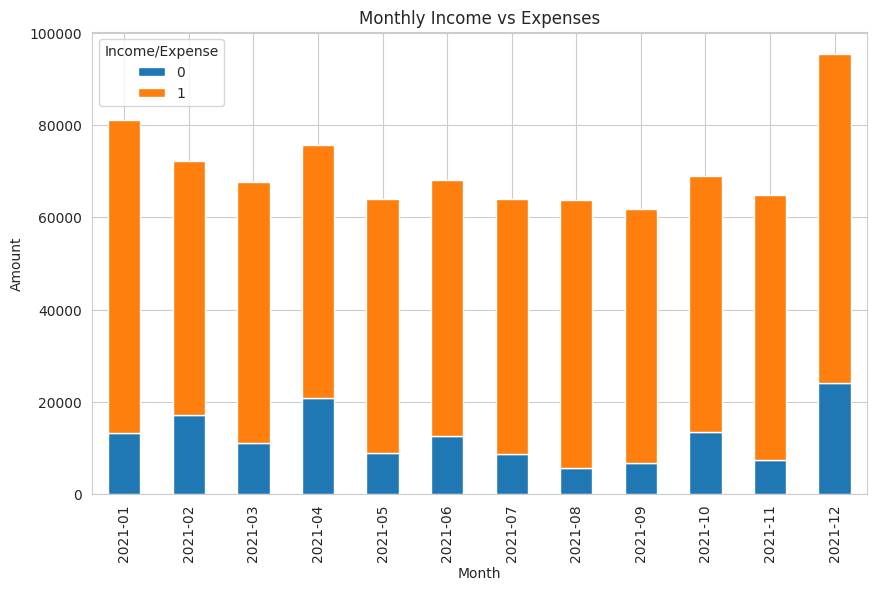

In [18]:
# Visualizations
sns.set_style('whitegrid')

# Monthly income vs expense trend
fin['Month'] = fin['Date / Time'].dt.to_period('M')
monthly_data = fin.groupby(['Month', 'Income/Expense'])['Debit/Credit'].sum().unstack()

monthly_data.plot(kind='bar', stacked=True, figsize=(10, 6), title="Monthly Income vs Expenses")
plt.ylabel('Amount')
plt.show()

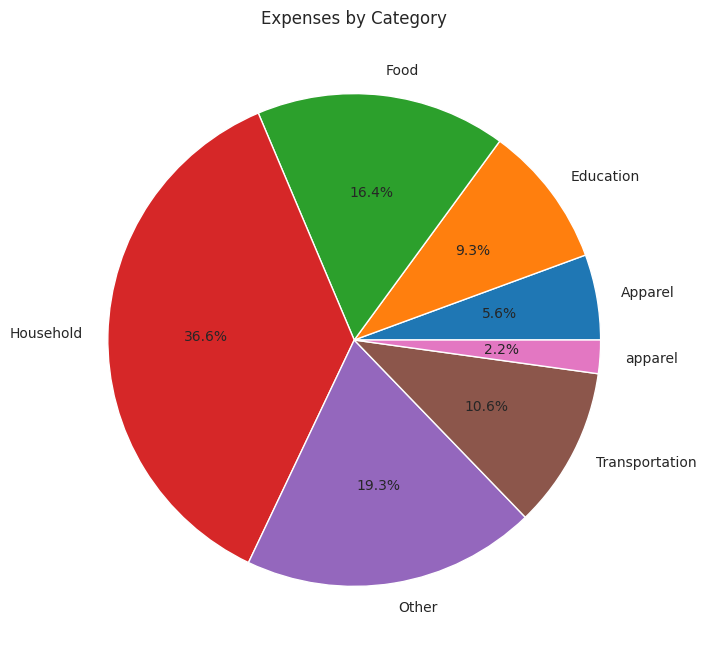

In [20]:
# Expense by category
expense_by_category = fin[fin['Income/Expense'] == 0].groupby('Category')['Debit/Credit'].sum()
expense_by_category.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Expenses by Category")
plt.ylabel('')
plt.show()

#Machine Learning Model

Predict Future Expenses

In [24]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Prepare data for modeling
fin['Day'] = fin['Date / Time'].dt.dayofyear
X = fin[['Day']].values
y = fin['Debit'].values


In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.0
R2 Score: 1.0


# Generate Recommendations

In [28]:
# Function to recommend budget adjustments
def recommend_budget(fin):
    avg_income = fin[fin['Income/Expense'] == 1]['Debit/Credit'].mean()
    avg_expense = abs(fin[fin['Income/Expense'] == 0]['Debit/Credit'].mean())
    savings_recommendation = avg_income * 0.2

    print(f"Average Monthly Income: {avg_income}")
    print(f"Average Monthly Expense: {avg_expense}")
    print(f"Recommended Savings: {savings_recommendation}")

recommend_budget(fin)

Average Monthly Income: 16235.976744186046
Average Monthly Expense: 823.3696703296703
Recommended Savings: 3247.195348837209


In [35]:

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load data
fin = pd.read_excel("/content/personal finance data.xlsx")
fin['Date / Time'] = pd.to_datetime(fin['Date / Time'])

# App title
st.title("- Personal Finance Advisor")

# Show data
st.header("Dataset")
st.write(fin.head())

# Income vs Expense chart
st.header("Income vs Expenses")
monthly_data = fin.groupby(fin['Date / Time'].dt.to_period('M'))['Debit/Credit'].sum()
st.line_chart(monthly_data)

# Recommendations
st.header("Recommendations")
avg_income = fin[fin['Income/Expense'] == 1]['Debit/Credit'].mean()
avg_expense = abs(fin[fin['Income/Expense'] == 0]['Debit/Credit'].mean())
savings_recommendation = avg_income * 0.2
st.write(f"Average Income: {avg_income}")
st.write(f"Average Expense: {avg_expense}")
st.write(f"Recommended Savings: {savings_recommendation}")



2025-01-08 08:52:20.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 08:52:20.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 08:52:20.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 08:52:20.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 08:52:20.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 08:52:20.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 08:52:20.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 08:52:20.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
streamlit run app.py
